In [4]:
import cv2 
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

# The goal : an image associated to its heatmap to be able to train the Unet model

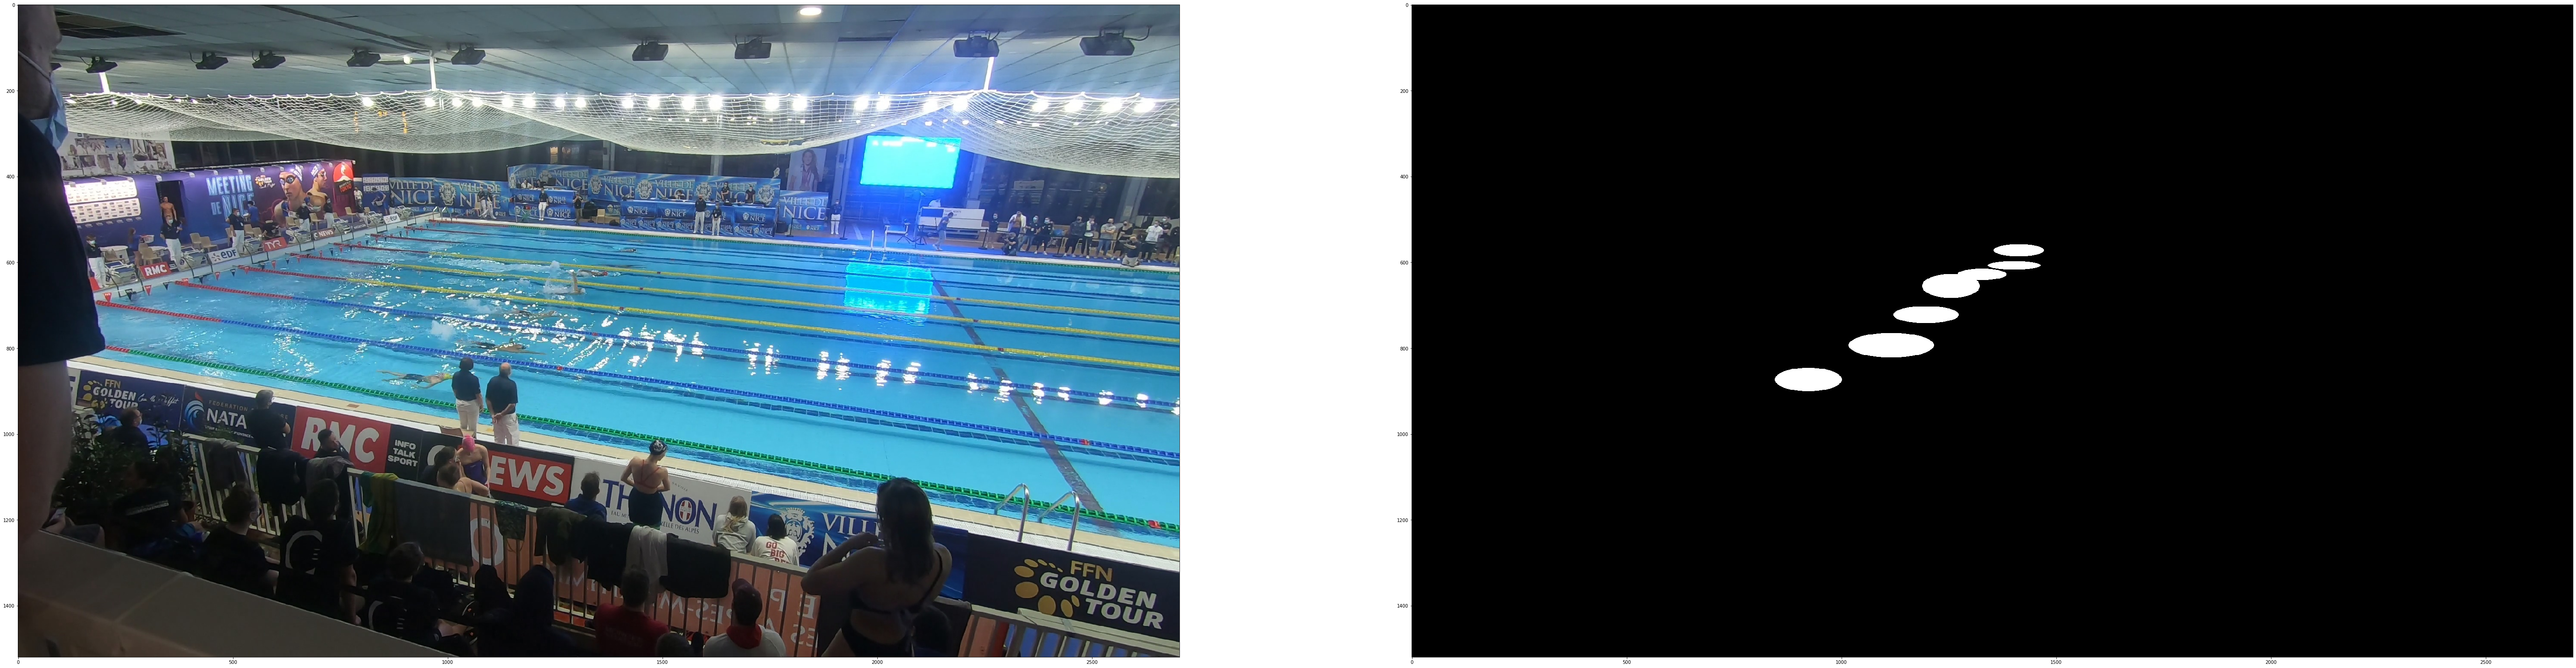

In [7]:
path_to_images = './examples/images'
path_to_heatmaps = './examples/heatmap'
img = cv2.imread(os.path.join(path_to_images, '50_DOS_M_FA_g_299.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
heatmap = cv2.imread(os.path.join(path_to_heatmaps, '50_DOS_M_FA_g_299.jpg'))
# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img);
ax[1].imshow(heatmap);
plt.rcParams['figure.figsize'] = [200, 300]

## Preprocessing and data organisation
We want to extract images from a video and then annotate them or extract images from videos from the labels you have. All those operations can get really messy so here we propose an organisation of the data and to stay with the video level and name.

In [ ]:
# Extraction of the images of a video
# Using the image extraction script
from image_extraction_nicolas import save_frames_rate, get_framename

frames_per_seconds = 0 # 0 for every frames, N > 0 for N frames per second
every_videos_path = '/your /folder /with /videos'
frames_save_path = 'your /directory /to save /the /images'
one_directory_per_video = False

if not os.path.isdir(frames_save_path) : os.mkdir(frames_save_path)

for root, dirs, files in os.walk(every_videos_path) :
    dirs.sort()
    for file in files :
        video_path = os.path.join(root, file)
        repo = root.split('/')[-1]
        print(video_path)
        save_frames_rate(video_path, 
                         frames_per_seconds, 
                         frames_save_path, 
                         repo, 
                         one_directory_per_video, 
                         start=4,# in seconds 
                         end=4) # in seconds

#### Important note 
All the image extraction codes and even de labelling software will name the images the same way: name_video_frame_number.extension. It is very pratical and allow us to relate different object together (the video, the images, the labels, the annotations)

In [14]:
# Extraction of the images of a video using the start of the race as the start of the extraction
from images_extraction_from_videos import save_frames_rate
from utils.prepro_startDetection_auto import extract_time_start

frames_per_seconds = 2 # 0 for every frames, N > 0 for one frame for every N seconds
every_videos_path = '/your /folder /with /videos'
frames_save_path = 'your /directory /to save /the /images'

one_directory_per_video = False
delete_folder = True

# extract_and_linearise_csv(csv_path)
#if delete_folder:
#    os.system('rm ' + frames_save_path + "/*")

#if not os.path.isdir(frames_save_path): os.mkdir(frames_save_path)

for root, dirs, files in os.walk(every_videos_path) :
    dirs.sort()
    for file in files :
        if file.split('.')[-1] == 'mp4' or file.split('.')[-1] == 'MP4' or file.split('.')[-1] == 'MOV':
            video_path = os.path.join(root, file)
            repo = root.split('/')[-1]
            start_time = extract_time_start(os.path.join(every_videos_path, file),
                                           bip_ref_path="./utils/ref_bip_isolated.wav")
            print(file + ' with start time: ' + str(start_time))
            save_frames_rate(video_path, frames_per_seconds, frames_save_path, repo,
                             one_directory_per_video, start=start_time, end=3)

/home/amigo/anaconda3/lib/python3.7/site-packages/moviepy/audio/AudioClip.py:114: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nbytes=2, chunksize=buffersize))


100_nl_dames_finaleA_f122020_droite.mp4 with start time: 17.45431396786156


FileNotFoundError: [Errno 2] No such file or directory: 'your /directory /to save /the /images'

#### Extraction from existing data
Now let's say we want the frames associated with labeled data. We have some scripts really specific depending on the data. Below, you can find a way to extract the images from the .xml files from LabelImg. In the repo there's also a script to extract the images from the videos analysed semi-manually by the French Swimming Federation. 

In [ ]:
# extraction using the fact that each label has the same name as the video and contains the frame number

from images_extraction_from_labelled_data import save_labelled_frames

every_videos_path = '/your /folder /with /videos'
frames_save_path = 'your /directory /to save /the /images'
labels_path = '/your /folder /with /the labels'

# get the name of the file of all labels
all_labels = [elmt.split('.')[0] for elmt in os.listdir(labels_path)]
# print(all_labels)
# print('100_nl_dames_finaleA_f122020_droite_1149' in all_labels)
one_directory_per_video = False
delete_folder = True

# extract_and_linearise_csv(csv_path)
if delete_folder:
    os.system('rm ' + frames_save_path + "/*")

if not os.path.isdir(frames_save_path): os.mkdir(frames_save_path)

for root, dirs, files in os.walk(every_videos_path) :
    dirs.sort()
    for file in files :
        video_path = os.path.join(root, file)
        repo = root.split('/')[-1]
        print(file + ' extracting')
        save_labelled_frames(video_path, all_labels, frames_save_path, repo,
                         one_directory_per_video, start=0, end=3)

## First step: Bounding box data
To annotate the data we use bounding boxes to indicate where the swimmer is. In this notebook,  we got data from the annotation tool: https://github.com/tzutalin/labelImg which gives xml files

In [6]:
# we get the xml data of all the folder into pandas dataFrame
from box_xml_to_pickleTensor import xml_to_dataframe

path_to_label = './examples/label'
data = xml_to_dataframe(path_to_label)
data.head()

Files with less than 8 swimmers :
End of files list



xmin  ymin  xmax  ymax                  frame  crawl  breaststroke  \
0   836   843  1010   904  50_DOS_M_FA_g_299.jpg      0             0   
1  1006   761  1227   825  50_DOS_M_FA_g_299.jpg      0             0   
2  1112   700  1282   744  50_DOS_M_FA_g_299.jpg      0             0   
3  1180   624  1330   686  50_DOS_M_FA_g_299.jpg      0             0   
4  1264   613  1390   643  50_DOS_M_FA_g_299.jpg      0             0   

   direction  confidence  
0          0           1  
1          0           1  
2          0           1  
3          0           1  
4          0           1

In [8]:
# then we can save the data 
data.to_pickle("./examples/save.pkl")

## Second step: From dataFrame to heatmap
We want to create tensors that are going to be the expected output of the model.

In [17]:
from data_gen import get_and_adapt_general_data, get_tensor, save_obj

# copy of the main of data_gen from Nicolas Jacquelin
# path of the saved data
path = './examples/save.pkl'
# path of the images 
img_repo = './examples/images'

# out path to save the results 
positives_path = './examples/results'
#importance_path = './examples/results'

if not os.path.isdir(positives_path) : os.mkdir(positives_path)
if not os.path.isdir(importance_path): os.mkdir(importance_path)

size = (512, 512)

data = get_and_adapt_general_data(path)
data['img_height'] = data['frame']

# go through the folder
for i, f in enumerate(data['frame'].unique()) :
    img_path = os.path.join(img_repo, f)
    tensor_path = os.path.join(positives_path, f[:-4]) # [:-4] to remove '.jpg'
    #importance_tensor_path = os.path.join(importance_path, f[:-4])  # [:-4] to remove '.jpg'

    if i%50==0 :
        print(f, ' is getting created.')
    frame_data = data[data['frame'] == f]

    tensor = get_tensor(frame_data, size, img_path)

    save_obj(tensor, tensor_path)
    
print("You can check that the heatmaps are in the folder " + positives_path)

50_DOS_M_FA_g_299.jpg  is getting created.
You can check that the heatmaps are in the folder ./examples/results


## Final step: replace the examples by your data
Once your a familiar with the data format and the function you can you either of the steps for your data. 